In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("webapp_data.csv")

In [3]:
df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [33]:
from sklearn.preprocessing import MinMaxScaler

comp_dict={
"blendproperty1":"Density",
"blendproperty2":"Viscosity",
"blendproperty3":"Heating Value",
"blendproperty4":"Cetane Number",
"blendproperty5":"Freezing Point",
"blendproperty6":"Smoke Point",
"blendproperty7":"Thermal Stability",
"blendproperty8":"Water Content",
"blendproperty9":"Particulate Matter",
"blendproperty10":"Corrosiveness",
"component1_fraction":"Diesel Fraction",
"component2_fraction":"Biofuel Fraction",
"component3_fraction":"Synthetic Fuel Fraction",
"component4_fraction":"Additives Fraction",
"component5_fraction":"Waste Oil Fraction",
}


compliance_criteria = {
    "Density": (1.0, 3.0),  # Example range for normalized density
    "Viscosity": (0.5, 2.5),  # Example range for normalized viscosity
    "Heating Value": (2.0, 4.0),  # Example range for normalized heating value
    "Cetane Number": (1.0, 3.0),  # Example range for cetane number
    "Freezing Point": (-4.0, 0.0),  # Example range for freezing point
    "Smoke Point": (2.0, 4.0),  # Example range for smoke point
    "Thermal Stability": (1.0, 3.0),  # Example range for thermal stability
    "Water Content": (0.0, 1.0),  # Example range for water content
    "Particulate Matter": (0.0, 1.0),  # Example range for particulate matter
    "Corrosiveness": (0.0, 2.0),  # Example range for corrosiveness
    "Diesel Fraction": (0.0, 2.0),  # Example range for diesel fraction
    "Biofuel Fraction": (0.0, 2.0),  # Example range for biofuel fraction
    "Synthetic Fuel Fraction": (0.0, 2.0),  # Example range for synthetic fuel fraction
    "Additives Fraction": (0.0, 1.0),  # Example range for additives fraction
    "Waste Oil Fraction": (0.0, 1.0),  # Example range for waste oil fraction
}

COMP_COST=[3,5,6,0.5,0]
PROPERTY_NAMES=[v for (k,v) in comp_dict.items() if "Fraction" not in v]
PREDICTED_PROPERTY_NAMES=[v+" (Predicted)" for v in PROPERTY_NAMES]
ORIGINAL_COMPONENT_NAMES=[k for (k,v) in comp_dict.items() if "Fraction" in v]
COMPONENT_NAMES=[v for (k,v) in comp_dict.items() if "Fraction" in v]
METRIC_NAMES=["Safety","Performance","Sustainability","Cost"]
X=df.iloc[:,55:]
X_comp=df.iloc[:,:5]

X.columns=PROPERTY_NAMES
X_comp.columns=COMPONENT_NAMES

scaler=MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_comp_scaled=pd.DataFrame(scaler.fit_transform(X_comp), columns=X_comp.columns)



In [114]:
import numpy as np
performance = np.average(pd.concat([
    df_scaled["Heating Value"],
    df_scaled["Cetane Number"],
    (1 - df_scaled["Viscosity"]),
    x_comp_scaled["Diesel Fraction"]
], axis=1),weights=[1,1,1,5],axis=1)  # Calculate the mean across the rows

safety=np.average(pd.concat([
(1 - df_scaled["Freezing Point"]),
(1 - df_scaled["Thermal Stability"])
],axis=1),weights=[1,5],axis=1)

sustainability=np.average(pd.concat([(1-df_scaled["Water Content"]),
                          (1-df_scaled["Particulate Matter"]),
                          (x_comp_scaled["Biofuel Fraction"]),
                          (x_comp_scaled["Synthetic Fuel Fraction"])],axis=1),weights=[1,1,5,1],axis=1)

<Axes: >

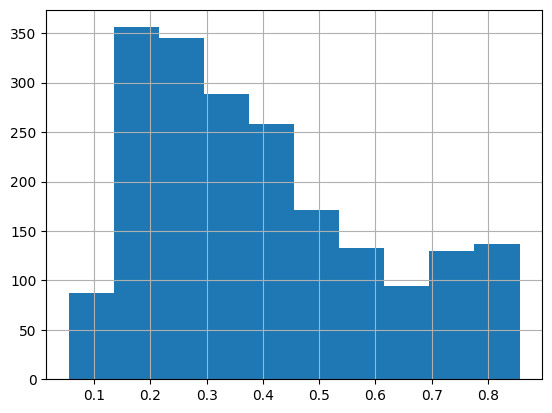

In [115]:
#pd.Series(performance).hist()
#pd.Series(safety).hist()
pd.Series(sustainability).hist()

In [32]:
performance

np.float64(0.047037678373288885)